<a href="https://colab.research.google.com/github/doblepensador/Tests/blob/master/Decision_Tree_Classifier_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import graphviz
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [17]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline


In [18]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_diabetes

# Data Loading 

In [19]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target']=iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [20]:
wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target']=wine.target
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [21]:
breast_cancer = load_breast_cancer()
breast_cancer_df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
breast_cancer_df['target'] = breast_cancer.target
breast_cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [22]:
diabetes = load_diabetes()
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df['target']=diabetes.target
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


# Decision Tree Classifier

In [15]:
model = DecisionTreeClassifier()
cross_val_score(
    model, X=iris.data, y=iris.target,
    cv=5,
    n_jobs=multiprocessing.cpu_count()
)

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

In [23]:
# Decision tree algorithm is suitable for learning rules,
# rather than numerical distance among data values or whatnot. 
# Therefore, Scaling data before running the algorithm does not affect the result. 

model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)
cross_val_score(
    model, 
    X=iris.data, y=iris.target,
    cv=5,
    n_jobs=multiprocessing.cpu_count()
)

array([0.96666667, 0.96666667, 0.9       , 1.        , 1.        ])

In [24]:
model = DecisionTreeClassifier()
model.fit(iris.data, iris.target)


DecisionTreeClassifier()

## Visualization of DecisionTree

### by TEXT

In [ ]:
by_text = tree.export_text(
    decision_tree=model,
    feature_names=iris.feature_names)
print(by_text)


### by Plot_tree

In [ ]:
by_plot = tree.plot_tree(
    decision_tree=model,
    feature_names=iris.feature_names)
print(by_plot)

### Using "graphviz"

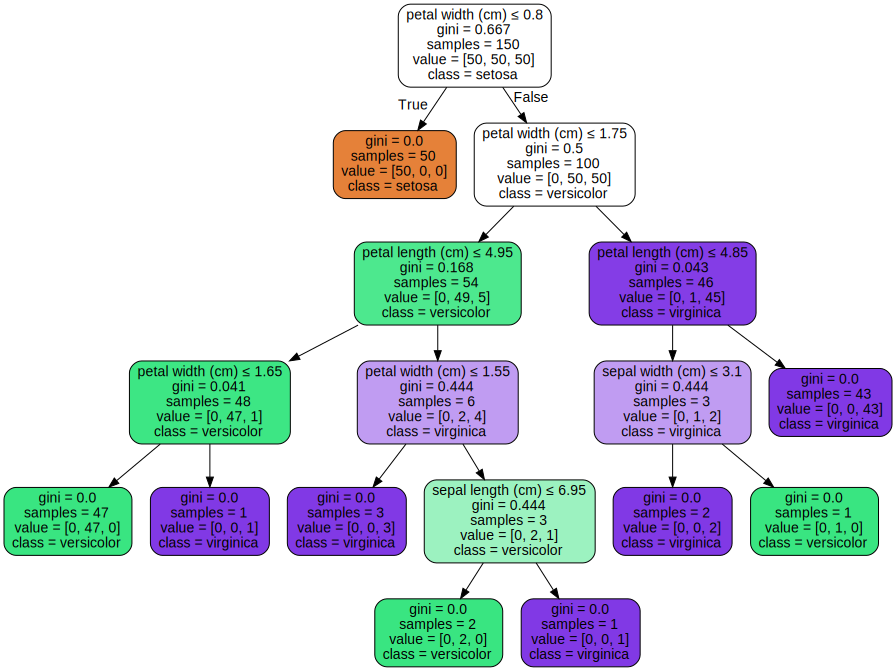

In [ ]:
for_using_graphviz = tree.export_graphviz(
    decision_tree=model,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(for_using_graphviz)
graph 

### Visualizing the actual process of DecisionTreeClassifier

In [ ]:
# We can only use two features at the same time. 
# But this section provides a clear explanation on how this algorithm works. 
n_classes = 3 
plot_colors = 'ryb'
plot_step = 0.02


#### Visualizing the boundary for each decision boudary

(0.0, 7.245, -0.9, 3.4800000000000044)

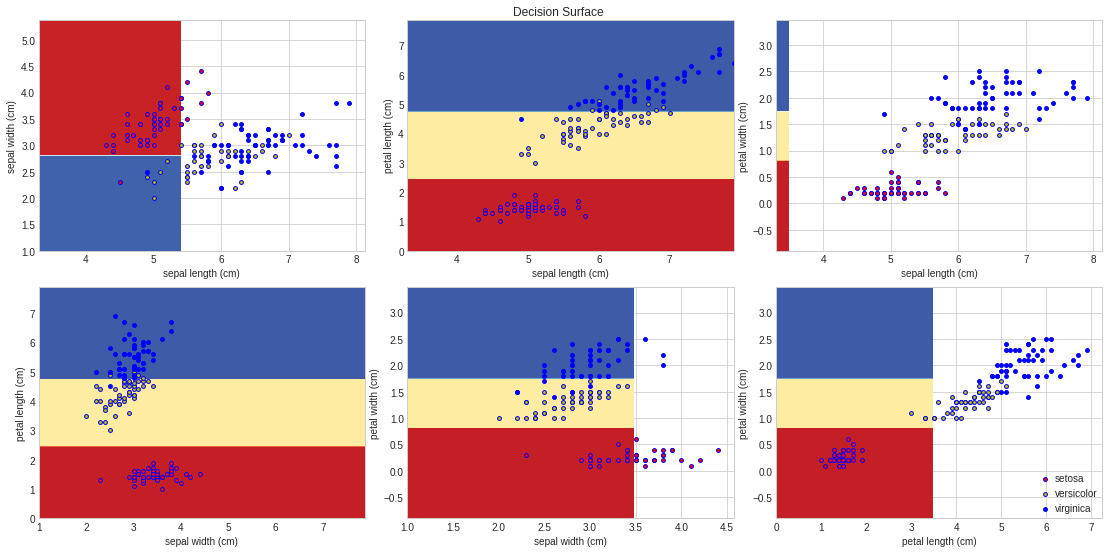

In [ ]:
plt.figure(figsize=(16, 8))

for pairidx, pair in enumerate([[0,1], 
                                [0,2],
                                [0,3],
                                [1,2],
                                [1,3],
                                [2,3]]):
  X= iris.data[:,pair]
  y= iris.target

  model=DecisionTreeClassifier(max_depth=2) #Hyperparameters
  model.fit(X,y)

  plt.subplot(2,3, pairidx+1)

  x_min, x_max = X[:,0].min()-1, X[:,1].max()+1
  y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

  Z= model.predict(np.column_stack([xx.ravel(), yy.ravel()]))
  Z= Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  plt.xlabel(iris.feature_names[pair[0]])
  plt.ylabel(iris.feature_names[pair[1]])

  for i, color in zip(range(n_classes), plot_colors):
    idx=np.where(y==i)
    plt.scatter(X[idx,0], X[idx,1], c=color, label=iris.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
    
plt.suptitle("Decision Surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')


# DecisionTreeRegressor

In [39]:
model = DecisionTreeRegressor()
cross_val_score(
    model, X=diabetes.data, y=diabetes.target,
    cv=5,
    n_jobs=multiprocessing.cpu_count()
)

# R_square is not always positive. 
# Considering the definition of it, 
# R^2 = 1 - SS_res/SS_tot
# SS_res and SS_tot are always positive. If SS_res >> SS_tot, you have a negative R^2.
# i.e., the model fits the data worse than a horizontal line.

array([-0.3624604 , -0.05420914, -0.18848031, -0.00265862, -0.28119981])

In [41]:
# Decision tree algorithm is suitable for learning rules,
# rather than numerical distance among data values or whatnot. 
# Therefore, Scaling data before running the algorithm does not affect the result. 

model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)
cross_val_score(
    model, 
    X=diabetes.data, y=diabetes.target,
    cv=5,
    n_jobs=multiprocessing.cpu_count()
)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


array([0.        , 0.01123596, 0.01136364, 0.01136364, 0.02272727])

In [42]:
model = DecisionTreeRegressor()
model.fit(diabetes.data, diabetes.target)


DecisionTreeRegressor()

## Visualization of DecisionTree

### by TEXT

In [ ]:
by_text = tree.export_text(
    decision_tree=model,
    feature_names=diabetes.feature_names)
print(by_text)


### by Plot_tree

[Text(0.5332420057200103, 0.9761904761904762, 's5 <= -0.004\nsquared_error = 5929.885\nsamples = 442\nvalue = 152.133'), Text(0.31162745604963804, 0.9285714285714286, 'bmi <= 0.006\nsquared_error = 3240.821\nsamples = 218\nvalue = 109.986'), Text(0.21325620475698034, 0.8809523809523809, 's3 <= 0.021\nsquared_error = 2143.968\nsamples = 171\nvalue = 96.31'), Text(0.12286711478800413, 0.8333333333333334, 's2 <= 0.091\nsquared_error = 2856.847\nsamples = 87\nvalue = 108.805'), Text(0.0952688728024819, 0.7857142857142857, 'sex <= 0.003\nsquared_error = 2496.899\nsamples = 85\nvalue = 105.682'), Text(0.04627714581178904, 0.7380952380952381, 'bp <= -0.035\nsquared_error = 2955.72\nsamples = 39\nvalue = 118.846'), Text(0.027404343329886244, 0.6904761904761905, 'age <= -0.051\nsquared_error = 2357.959\nsamples = 21\nvalue = 100.429'), Text(0.012409513960703205, 0.6428571428571429, 'bp <= -0.092\nsquared_error = 2049.0\nsamples = 8\nvalue = 133.5'), Text(0.010341261633919338, 0.5952380952380952

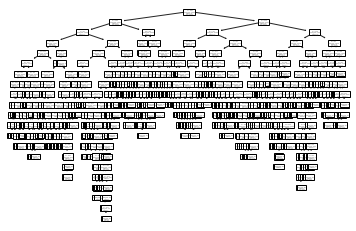

In [ ]:
by_plot = tree.plot_tree(
    decision_tree=model,
    feature_names=diabetes.feature_names)
print(by_plot)

### Using "graphviz"

In [ ]:
for_using_graphviz = tree.export_graphviz(
    decision_tree=model,
    feature_names=diabetes.feature_names,
    filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(for_using_graphviz)
graph 

### Visualizing the actual process of DecisionTreeClassifier

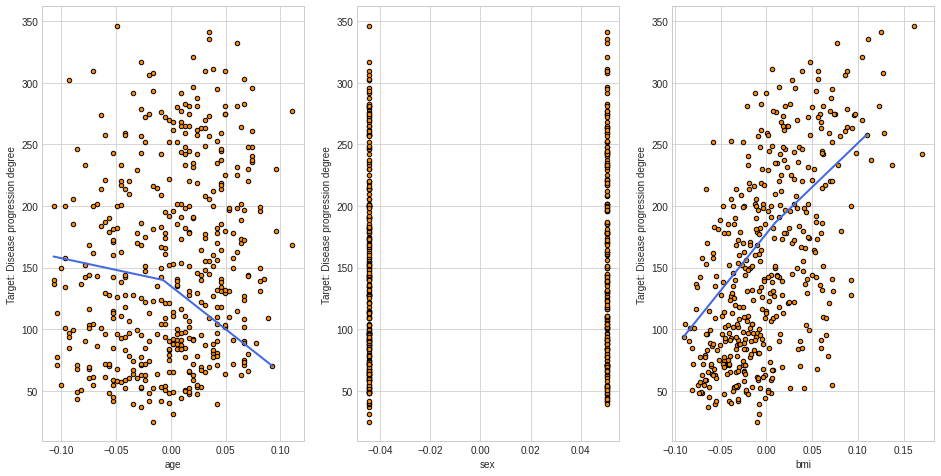

In [49]:
plt.figure(figsize=(16, 8))

for pairidx, pair in enumerate([0,1,2]): 
  X = diabetes.data[:,pair].reshape(-1, 1) 
  #Array를 행의 수는 정해주지 않은 상태로 열의 개수를 정해 주어 행은 열의 개수에 맞춰서 배열되도록 하는 함수.
  y = diabetes.target

  model = DecisionTreeRegressor() #Hyperparameter 조정할 수 있음. 
  model.fit(X, y)

  X_test = np.arange(min(X), max(X), 0.1)[:, np.newaxis]
  #In [7]: arr = np.arange(4)
  #In [8]: arr.shape
  #Out[8]: (4,)
  
  #In [9]: row_vec = arr[np.newaxis, :]
  #In [10]: row_vec.shape
  #Out[10]: (1, 4)
  
  #In [11]: col_vec = arr[:, np.newaxis]
  #In [12]: col_vec.shape
  #Out[12]: (4, 1)
  predict = model.predict(X_test)

  plt.subplot(1,3, pairidx+1)
  plt.scatter(X, y, s=20, edgecolors='k', c='darkorange', label='data')
  plt.plot(X_test, predict, color="royalblue", linewidth=2)
  plt.xlabel(diabetes.feature_names[pair])
  plt.ylabel('Target: Disease progression degree')

